In [2]:
!pip install matplotlib numpy pillow tensorflow tensorflow-datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds

## Prepare Dataset

In [4]:
# Load the EMNIST 'byclass' dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Convert datasets to NumPy arrays
train_images = []
train_labels = []
for image, label in tfds.as_numpy(ds_train):
    train_images.append(image)
    train_labels.append(label)

test_images = []
test_labels = []
for image, label in tfds.as_numpy(ds_test):
    test_images.append(image)
    test_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape images to (28,28,1)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TRAIN LABELS: ", train_labels.shape)
print("TEST IMAGES: ", test_images.shape)
print("TEST LABELS: ", test_labels.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.AA89DI_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.AA89DI_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
TRAIN IMAGES:  (697932, 28, 28, 1)
TRAIN LABELS:  (697932,)
TEST IMAGES:  (116323, 28, 28, 1)
TEST LABELS:  (116323,)


In [22]:
# (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# train_images = train_images.reshape((60000, 28, 28, 1))
# test_images = test_images.reshape((10000, 28, 28, 1))

# # Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

# print("TRAIN IMAGES: ", train_images.shape)
# print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Create Model

In [9]:
# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),  # Input layer for 28x28 grayscale images
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(62, activation='softmax')  # Output layer with 62 units (for 62 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [5]:
# num_classes = 10
# img_height = 28
# img_width = 28

# model = Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='sigmoid')
# ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 62)             │         4,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,702 (377.74 KB)

 Trainable params: 96,702 (377.74 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [12]:
epochs = 10
history = model.fit(
  train_images,
  train_labels,
  epochs = epochs
)

Epoch 1/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 425s 19ms/step - accuracy: 0.7845 - loss: 0.6857
Epoch 2/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 419s 19ms/step - accuracy: 0.8566 - loss: 0.3942
Epoch 3/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 418s 19ms/step - accuracy: 0.8631 - loss: 0.3693
Epoch 4/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 418s 19ms/step - accuracy: 0.8657 - loss: 0.3596
Epoch 5/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 418s 19ms/step - accuracy: 0.8672 - loss: 0.3527
Epoch 6/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 417s 19ms/step - accuracy: 0.8689 - loss: 0.3494
Epoch 7/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 417s 19ms/step - accuracy: 0.8699 - loss: 0.3441
Epoch 8/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 417s 19ms/step - accuracy: 0.8714 - loss: 0.3407
Epoch 9/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 417s 19ms/step - accuracy: 0.8712 - loss: 0.3399
Epoch 10/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 417s 19ms/step - accuracy: 0.8721 - loss: 0.3370


## Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

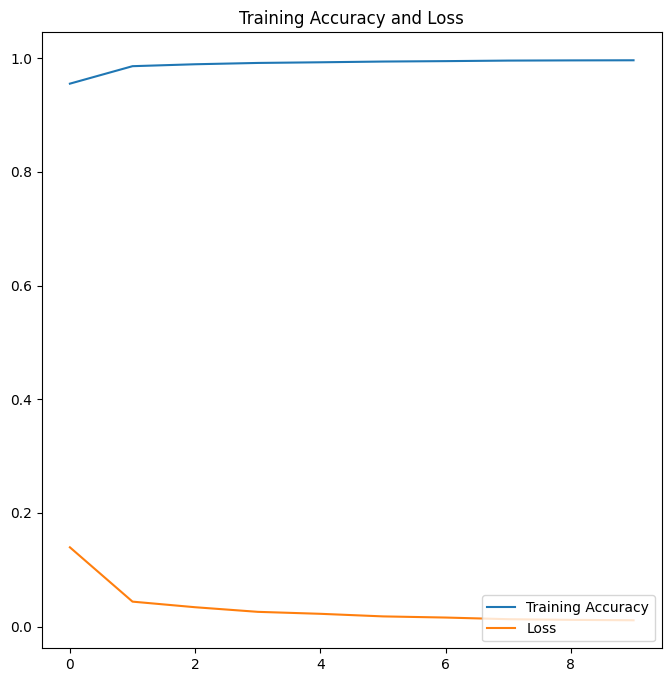

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')


## Test Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
Prediction of model: 0


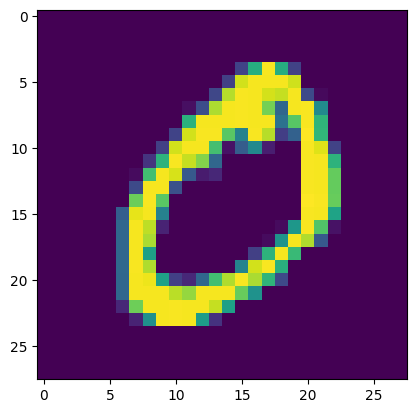

In [10]:
image = (train_images[1]).reshape(1,28,28,1)
# model_pred = model.predict_classes(image, verbose=0)
model_pred = np.argmax(model.predict(image), axis=-1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction of model: 4


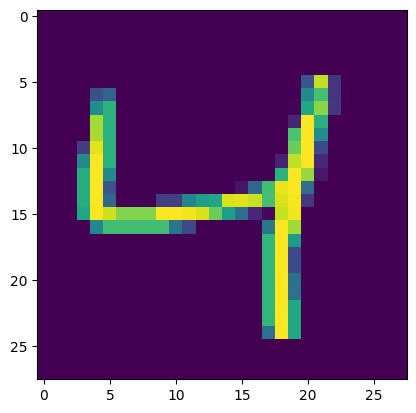

In [11]:
image = (train_images[2]).reshape(1,28,28,1)
# model_pred = model.predict_classes(image, verbose=0)
model_pred = np.argmax(model.predict(image), axis=-1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

## Test Multiple Image

Test images array shape: (4, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 4


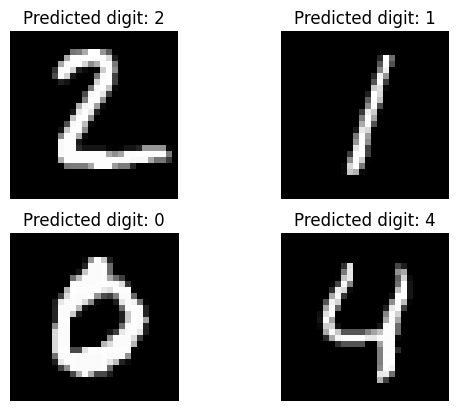

In [12]:

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    # prediction = model.predict_classes(test_image, verbose=0)
    prediction = np.argmax(model.predict(test_image), axis=-1)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


## Save Model

In [13]:
model.save("tf-cnn-model.h5")

In [14]:
model.save('tf_cnn_model_.keras')

## Load Model

In [15]:
loaded_model = models.load_model("tf-cnn-model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction of model: 4


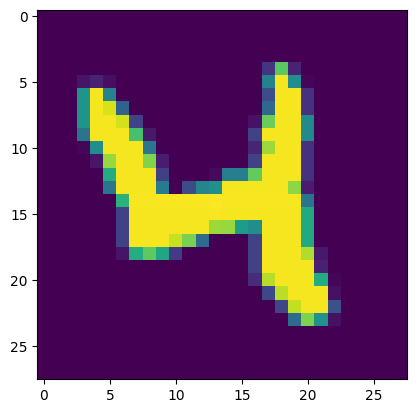

In [20]:
image = (train_images[20]).reshape(1,28,28,1)
# model_pred = loaded_model.predict_classes(image, verbose=0)
model_pred = np.argmax(loaded_model.predict(image), axis=-1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))